# 1. Importación de los datos (1 punto)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Datos/all-euro-data-2020-2021.xlsx')
data['Date']=pd.to_datetime(data['Date']) # Pasamos el campo 'Date' a formato datetime

# 2. Formamos una serie temporal en formato pd.Series (1 punto)

In [3]:
data_grp=data.groupby('Date').mean()
ts=data_grp['FTHG']
ts=pd.Series(ts)
print(ts)

Date
2020-09-12    1.250000
2020-09-13    0.000000
2020-09-14    0.500000
2020-09-19    3.000000
2020-09-20    1.500000
                ...   
2021-05-15    1.333333
2021-05-16    1.500000
2021-05-18    1.500000
2021-05-19    0.833333
2021-05-23    2.100000
Name: FTHG, Length: 135, dtype: float64


# 3. Creamos una función que haga la descomposición trend, seasonal y residuo (2 puntos)

In [4]:
def funct_decompose(ts):
    'Pasamos como parámetro la serie temporal en formato series'
    from statsmodels.tsa.seasonal import seasonal_decompose as decompose
    
    task=decompose(ts,freq=7) #Ajustamos la frecuencia a 7 pasos
    trend=task.trend
    trend=trend.dropna()
    season=task.seasonal
    season=season.dropna()
    resid=task.resid
    resid=resid.dropna() #Eliminamos los valores nulos
    '''
    Dibujamos las distintas componentes
    '''
    plt.title('Ts original')
    plt.plot(ts)
    plt.show()
    plt.title('Ts trend')
    plt.plot(task.trend)
    plt.show()
    plt.title('Ts seasonal')
    plt.plot(task.seasonal)
    plt.show()
    plt.title('Ts resid')
    plt.plot(task.resid)
    plt.show()
    
    
    
    return [trend,season,resid] #DEvolvemos las tres componentes
    

# 4. Aplicamos la función a la feature 'FTHG' (1 punto)

C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


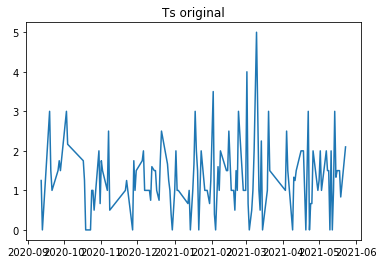

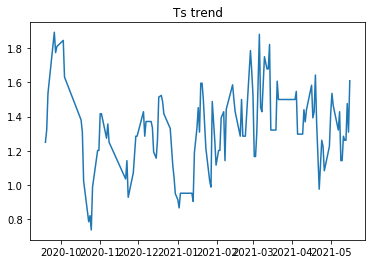

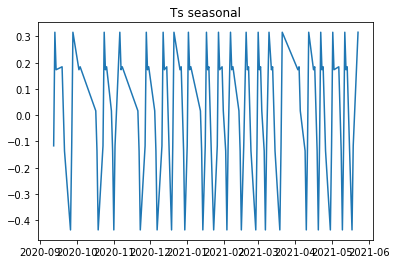

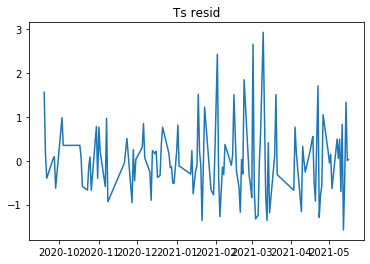

In [5]:
out=funct_decompose(ts)

# 5. Aplicamos el test df al residuo para ver si es estacionario (1 punto)

In [6]:
from statsmodels.tsa.stattools import adfuller as df  
result=df(out[2],autolag='AIC')
print(result)
print()
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

(-7.981274509106882, 2.619431891334323e-12, 9, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 217.99097362551967)

Estadístico -7.981274509106882
P-value 2.619431891334323e-12
Valores críticos {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}



El residuo es estacionario

# 6. Aplicamos la misma metodología a la feature 'FTAG' (1 punto)

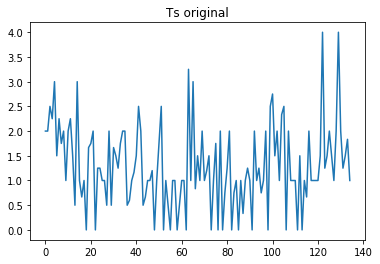

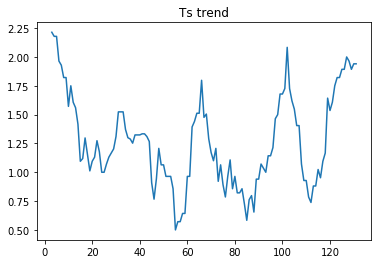

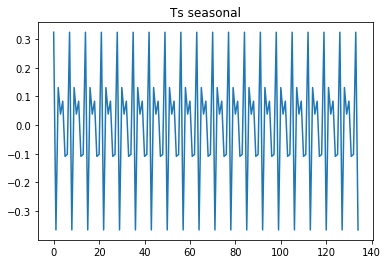

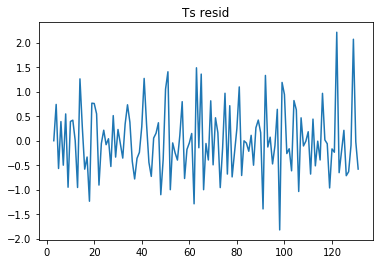

(-8.08332841626809, 1.4417433276056242e-12, 6, 122, {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}, 205.69129840833287)

Estadístico -8.08332841626809
P-value 1.4417433276056242e-12
Valores críticos {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}



In [8]:
feat='FTAG' #Decidimos la feature que vamos a estudiar
ts=pd.Series(data_grp[feat].values) #Creamos una serie temporal de naturaleza Series
out=funct_decompose(ts) #Aplicamos la descomposición
'''
Aplicamos el test
'''
result=df(out[2],autolag='AIC')
print(result)
print()
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

# 7. Aplicamos la misma metodología a las features 'HTHG' y  'HTAG' (1 punto)

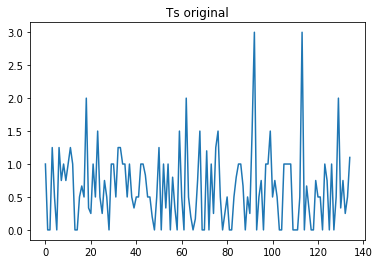

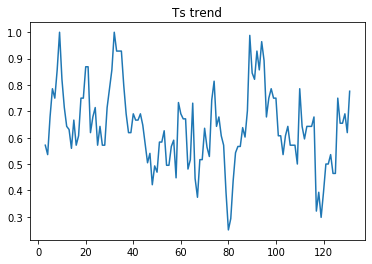

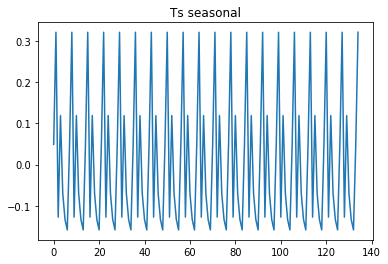

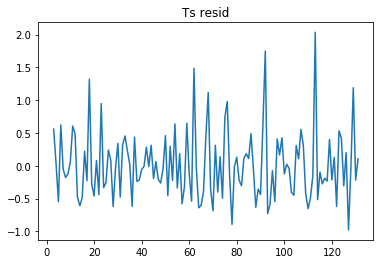

(-5.972829435178522, 1.918142477901587e-07, 13, 115, {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}, 122.79690043161213)

Estadístico -5.972829435178522
P-value 1.918142477901587e-07
Valores críticos {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}



In [10]:
feat='HTHG' #Decidimos la feature que vamos a estudiar
ts=pd.Series(data_grp[feat].values) #Creamos una serie temporal de naturaleza Series
out=funct_decompose(ts) #Aplicamos la descomposición
'''
Aplicamos el test
'''
result=df(out[2],autolag='AIC')
print(result)
print()
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

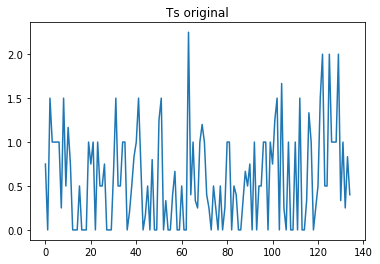

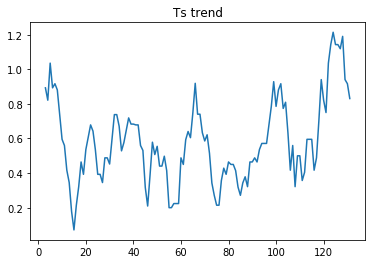

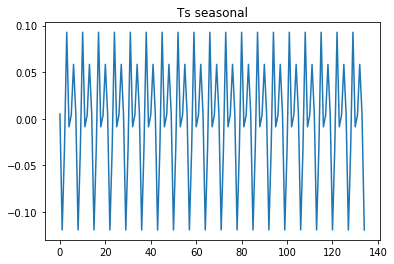

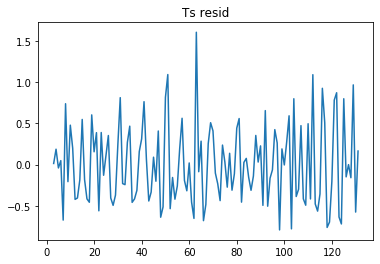

(-5.259312447837872, 6.644649454538232e-06, 13, 115, {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}, 121.5620632720356)

Estadístico -5.259312447837872
P-value 6.644649454538232e-06
Valores críticos {'1%': -3.4885349695076844, '5%': -2.887019521656941, '10%': -2.5803597920604915}



In [11]:
feat='HTAG' #Decidimos la feature que vamos a estudiar
ts=pd.Series(data_grp[feat].values) #Creamos una serie temporal de naturaleza Series
out=funct_decompose(ts) #Aplicamos la descomposición
'''
Aplicamos el test
'''
result=df(out[2],autolag='AIC')
print(result)
print()
print('Estadístico',result[0])
print('P-value',result[1])
print('Valores críticos',result[4])
print()

# 8. Discusión (2 puntos):

   1. ¿Son más estacionarios los residuos de las variables a final del partido o al descanso?. Justifica tu respuesta.
   
   2. ¿Encuentras alguna justificación para las diferencias encontradas?. ¿Hay algún aspecto del juego que justifique aparentemente dichas diferencias?.
   
   3. ¿Dónde podríamos esperar mayor precisión de un modelo ARIMA, aplicado al descanso o a final del partido?.
   
   4. Si quisiéramos entrenar un modelo ARIMA, ¿sobre qué señal de la descomposición lo aplicaríamos?. Justifica tu respuesta.
   
   5. ¿Se te ocurre alguna forma de relacionar el concepto de estacionariedad en series deportivas y la creación de un método de apuestas?
   
   